In [1]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from itertools import cycle

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

In [3]:
from kmeans import KMeansClusterClassifier

# 1.1. K-MEANS CLUSTERING CLASSIFIER

## 1.1.1. PREPARING THE DATA SET

Veri setinin .csv uzantılı dosyadan çekilmesi aşağıdaki satırda yapılmıştır. İkinci okuma ise "*pair plots*" çizimi için ileriki aşamalarda kullanılacaktır.

In [4]:
iris_veri = pd.read_csv("Iris.csv");
display(iris_veri)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Veri setinin analizine başlanmadan önce ilk sütundaki Id bilgisi ve son sütünda "*string*" tipinde bulunan çiçek türleri sırayla "0,1,2" olarak düzenlenmiştir. 

In [5]:
iris_veri = iris_veri.drop(labels="Id", axis=1);
spc = {'Iris-setosa': 0,'Iris-versicolor': 1,'Iris-virginica': 2}
iris_veri["Species"] = [spc[item] for item in iris_veri["Species"]];
display(iris_veri)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Veri setinin etiketlerine bağlı olarak sıralı yapıda verilmiştir. Bu nedenle veri seti işlemlere başlanmadan önce karıştırılmalıdır. Bu işlem aşağıdaki satırda gerçekleştirilmiştir. Eğer karıştırma işlemi yapılmasaydı model bazı türleri öğrenemezdi.

In [6]:
shuffled_iris = iris_veri.sample(frac=1).reset_index(drop=True)
display(shuffled_iris);

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.2,3.5,1.5,0.2,0
1,5.5,3.5,1.3,0.2,0
2,5.7,2.9,4.2,1.3,1
3,5.7,2.6,3.5,1.0,1
4,6.9,3.1,5.4,2.1,2
...,...,...,...,...,...
145,6.1,3.0,4.6,1.4,1
146,4.9,3.0,1.4,0.2,0
147,5.0,3.4,1.5,0.2,0
148,6.3,2.5,5.0,1.9,2


In [7]:
x = shuffled_iris.values.tolist()
y = []

for row in x:
    y.append(int(row[4]))
    del row[4]

x = pd.Series(x)
y = pd.Series(y)


X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, shuffle = True)

X_train_list = X_train.values.tolist()
X_test_list = X_test.values.tolist()
Y_train_list = Y_train.values.tolist()
Y_test_list = Y_test.values.tolist()


## 1.1.2. DETERMINING THE K VALUE

Optimal küme sayısını belirlemek için, "*elbow curve*" kullanılmaktadır. Buradaki mantık eğrinin doğrusal bir şekilde azalmaya başladığı noktanın seçilmesidir. 

Buradan yola çıkılacak olursa, veriler için en uygun küme sayısının grafikten 3 olduğu sonucuna varılmaktadır.

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


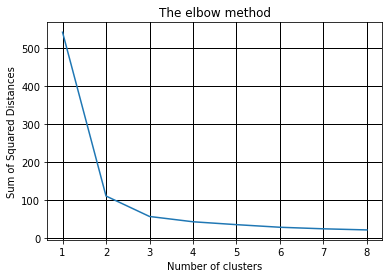

In [8]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 9):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 5, n_init = 10, random_state = 0)
    kmeans.fit(X_train_list)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.grid(color='k', linestyle='-', linewidth=1)
plt.plot(range(1, 9), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances') #within cluster sum of squares
plt.show()

## 1.1.3. TRAINING THE CLASSIFIER

In [9]:
kmeansclassifier = KMeansClusterClassifier(n_cluster = 3)
trained_clusters = kmeansclassifier.fit(X_train_list)
print(trained_clusters)
print("\n")
print(Y_train_list)

[[[5.2, 3.5, 1.5, 0.2], [4.7, 3.2, 1.3, 0.2], [4.8, 3.0, 1.4, 0.3], [4.5, 2.3, 1.3, 0.3], [5.0, 3.2, 1.2, 0.2], [5.0, 3.5, 1.3, 0.3], [4.7, 3.2, 1.6, 0.2], [4.4, 3.0, 1.3, 0.2], [5.1, 3.8, 1.6, 0.2], [5.1, 3.5, 1.4, 0.3], [5.1, 3.7, 1.5, 0.4], [5.4, 3.7, 1.5, 0.2], [4.8, 3.0, 1.4, 0.1], [5.0, 3.4, 1.5, 0.2], [5.7, 4.4, 1.5, 0.4], [5.1, 3.3, 1.7, 0.5], [4.6, 3.4, 1.4, 0.3], [4.4, 2.9, 1.4, 0.2], [5.5, 4.2, 1.4, 0.2], [4.8, 3.4, 1.6, 0.2], [5.2, 4.1, 1.5, 0.1], [5.4, 3.9, 1.7, 0.4], [4.6, 3.2, 1.4, 0.2], [4.8, 3.1, 1.6, 0.2], [5.4, 3.9, 1.3, 0.4], [5.0, 3.4, 1.6, 0.4], [5.1, 3.8, 1.5, 0.3], [4.3, 3.0, 1.1, 0.1], [4.9, 3.1, 1.5, 0.1], [5.0, 3.5, 1.6, 0.6], [4.6, 3.1, 1.5, 0.2], [4.8, 3.4, 1.9, 0.2], [5.8, 4.0, 1.2, 0.2], [5.7, 3.8, 1.7, 0.3], [4.6, 3.6, 1.0, 0.2], [5.3, 3.7, 1.5, 0.2], [5.1, 3.5, 1.4, 0.2], [4.9, 3.1, 1.5, 0.1], [5.0, 3.6, 1.4, 0.2], [4.9, 3.0, 1.4, 0.2], [5.1, 3.4, 1.5, 0.2]], [[7.2, 3.2, 6.0, 1.8], [6.5, 3.0, 5.2, 2.0], [6.9, 3.2, 5.7, 2.3], [7.2, 3.6, 6.1, 2.5], [7.2, 

In [10]:
predicted_clusters = kmeansclassifier.predict(X_test_list)
print(predicted_clusters)
print("\n")
print(Y_test_list)

[[[5.4, 3.4, 1.7, 0.2], [5.1, 3.8, 1.9, 0.4], [5.5, 3.5, 1.3, 0.2], [5.0, 3.0, 1.6, 0.2], [5.0, 3.3, 1.4, 0.2], [5.2, 3.4, 1.4, 0.2], [4.9, 3.1, 1.5, 0.1], [4.4, 3.2, 1.3, 0.2], [5.4, 3.4, 1.5, 0.4]], [[7.6, 3.0, 6.6, 2.1], [7.7, 3.8, 6.7, 2.2], [6.7, 2.5, 5.8, 1.8], [6.9, 3.1, 5.1, 2.3], [6.1, 2.6, 5.6, 1.4], [6.7, 3.3, 5.7, 2.5], [7.7, 2.6, 6.9, 2.3]], [[5.8, 2.7, 5.1, 1.9], [5.1, 2.5, 3.0, 1.1], [6.2, 2.2, 4.5, 1.5], [6.0, 2.7, 5.1, 1.6], [6.1, 3.0, 4.6, 1.4], [5.8, 2.7, 3.9, 1.2], [6.3, 2.7, 4.9, 1.8], [5.6, 2.5, 3.9, 1.1], [5.0, 2.0, 3.5, 1.0], [6.3, 2.8, 5.1, 1.5], [5.6, 2.9, 3.6, 1.3], [6.0, 3.4, 4.5, 1.6], [5.7, 2.8, 4.1, 1.3], [6.1, 3.0, 4.9, 1.8]]]


[2, 1, 1, 1, 0, 2, 0, 2, 2, 0, 0, 1, 2, 0, 1, 0, 2, 2, 0, 0, 1, 2, 0, 1, 2, 1, 1, 1, 2, 2]


# 1.2. RESULTS

## 1.2.1. 3D PLOT FOR TRAINING DATA

In [11]:
np_trained_clusters = np.array(trained_clusters[0])
np_trained_clusters1 = np.array(trained_clusters[1])
np_trained_clusters2 = np.array(trained_clusters[2])

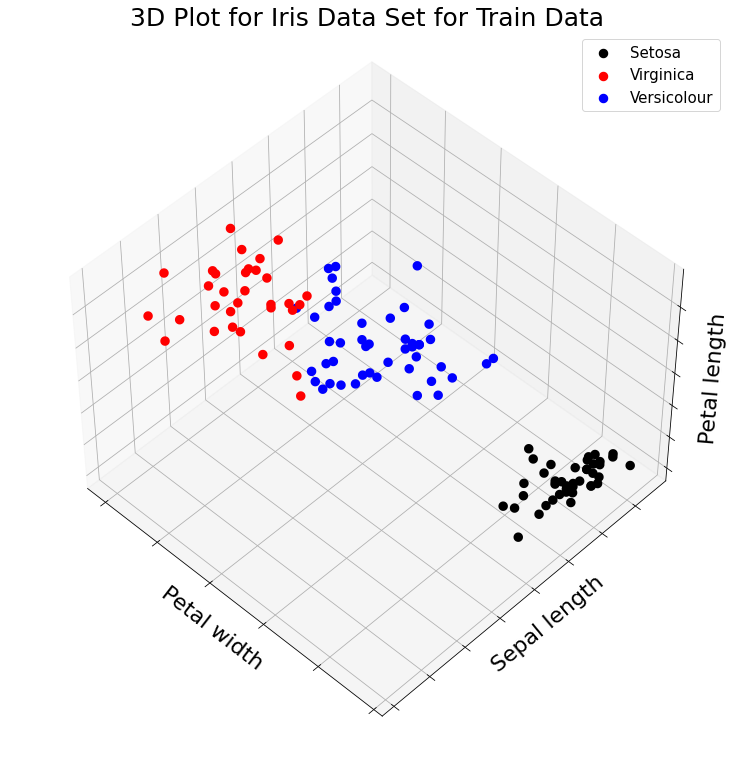

In [17]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(30, 10))

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])

ax.scatter3D( np_trained_clusters[:,3], np_trained_clusters[:,0], np_trained_clusters[:,2],  color='k',edgecolor="k", alpha=1, linewidths=5, label="Setosa");
ax.scatter3D( np_trained_clusters1[:,3], np_trained_clusters1[:,0], np_trained_clusters1[:,2],  color='r',edgecolor="r", alpha=1, linewidths=5, label="Virginica");
ax.scatter3D( np_trained_clusters2[:,3], np_trained_clusters2[:,0], np_trained_clusters2[:,2],  color='b',edgecolor="b", alpha=1, linewidths=5, label="Versicolour");

plt.legend(loc="upper right", prop={'size': 15})

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel("Petal width", fontsize=22)
ax.set_ylabel("Sepal length", fontsize=22)
ax.set_zlabel("Petal length", fontsize=22)
ax.set_title("3D Plot for Iris Data Set for Train Data", fontsize=25)
ax.dist = 11

## 1.2.2. 3D PLOT FOR TEST DATA

In [13]:
np_predicted_clusters = np.array(predicted_clusters[0])
np_predicted_clusters1 = np.array(predicted_clusters[1])
np_predicted_clusters2 = np.array(predicted_clusters[2])

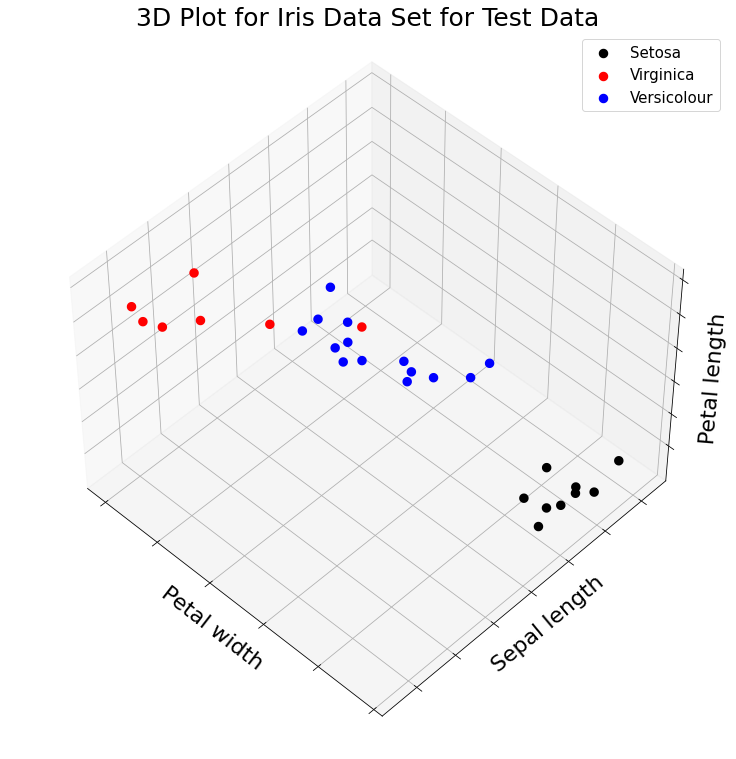

In [18]:
fig = plt.figure(figsize=(30, 10))

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])

ax.scatter3D( np_predicted_clusters[:,3], np_predicted_clusters[:,0], np_predicted_clusters[:,2],  color='k',edgecolor="k", alpha=1, linewidths=5, label="Setosa");
ax.scatter3D( np_predicted_clusters1[:,3], np_predicted_clusters1[:,0], np_predicted_clusters1[:,2],  color='r',edgecolor="r", alpha=1, linewidths=5, label="Virginica");
ax.scatter3D( np_predicted_clusters2[:,3], np_predicted_clusters2[:,0], np_predicted_clusters2[:,2],  color='b',edgecolor="b", alpha=1, linewidths=5, label="Versicolour");

plt.legend(loc="upper right", prop={'size': 15})

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel("Petal width", fontsize=22)
ax.set_ylabel("Sepal length", fontsize=22)
ax.set_zlabel("Petal length", fontsize=22)
ax.set_title("3D Plot for Iris Data Set for Test Data", fontsize=25)
ax.dist = 11

## 1.2.3. PREPARING THE DATA FOR PERFORMANCE METRICS

Bu adımda başlık 1.2.4 ve 1.2.5'te hesaplanılacak olan başarım metrikleri ve "*confisuon matrix*" için veriler bir ön düzenleme aşamasından geçirilmiştir. Bu sayede veriler üzerinde daha kolay işlem yapılması sağlanmıştır.

In [63]:
import copy

cpy_trained_clusters = copy.deepcopy(trained_clusters)


for i in range(len(cpy_trained_clusters[0])):
    cpy_trained_clusters[0][i].append(0)
for i in range(len(cpy_trained_clusters[1])):
    cpy_trained_clusters[1][i].append(2)
for i in range(len(cpy_trained_clusters[2])):
    cpy_trained_clusters[2][i].append(1)
    
    
for i in range(len(cpy_trained_clusters[0])):
    cpy_trained_clusters[0][i].append(0)
for i in range(len(cpy_trained_clusters[1])):
    cpy_trained_clusters[1][i].append(2)
cpy_trained_clusters[1][12][5] = 1
cpy_trained_clusters[1][27][5] = 1
cpy_trained_clusters[1][32][5] = 1
for i in range(len(cpy_trained_clusters[2])):
    cpy_trained_clusters[2][i].append(1)
cpy_trained_clusters[2][15][5] = 2
cpy_trained_clusters[2][12][5] = 2
cpy_trained_clusters[2][3][5] = 2
cpy_trained_clusters[2][28][5] = 2
cpy_trained_clusters[2][26][5] = 2
cpy_trained_clusters[2][29][5] = 2
cpy_trained_clusters[2][9][5] = 2
cpy_trained_clusters[2][32][5] = 2
cpy_trained_clusters[2][23][5] = 2
    
#display(cpy_trained_clusters)

predicted_train_vals = np.array(cpy_trained_clusters[0])
predicted_train_vals = predicted_train_vals[:,4]
temp1 = np.array(cpy_trained_clusters[1])
temp1 = temp1[:,4]
temp2 = np.array(cpy_trained_clusters[2])
temp2 = temp2[:,4]
predicted_train_vals = np.append(predicted_train_vals, temp1)
predicted_train_vals = np.append(predicted_train_vals, temp2)
print(predicted_train_vals) #ONEMLI

real_train_vals = np.array(cpy_trained_clusters[0])
real_train_vals = real_train_vals[:,5]
temp3 = np.array(cpy_trained_clusters[1])
temp3 = temp3[:,5]
temp4 = np.array(cpy_trained_clusters[2])
temp4 = temp4[:,5]
real_train_vals = np.append(real_train_vals, temp3)
real_train_vals = np.append(real_train_vals, temp4)
print(real_train_vals) #ONEMLI

#predicted_train_vals = copy.deepcopy()

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2.
 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 1. 1. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1.
 1. 2. 1. 1. 2. 1. 2. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [70]:
cpy_predicted_clusters = copy.deepcopy(predicted_clusters)


for i in range(len(cpy_predicted_clusters[0])):
    cpy_predicted_clusters[0][i].append(0)
for i in range(len(cpy_predicted_clusters[1])):
    cpy_predicted_clusters[1][i].append(2)
for i in range(len(cpy_predicted_clusters[2])):
    cpy_predicted_clusters[2][i].append(1)
    
#display(cpy_predicted_clusters)

for i in range(len(cpy_predicted_clusters[0])):
    cpy_predicted_clusters[0][i].append(0)
for i in range(len(cpy_predicted_clusters[1])):
    cpy_predicted_clusters[1][i].append(2)
for i in range(len(cpy_predicted_clusters[2])):
    cpy_predicted_clusters[2][i].append(1)
cpy_predicted_clusters[2][6][5] = 2
cpy_predicted_clusters[2][13][5] = 2
cpy_predicted_clusters[2][9][5] = 2
cpy_predicted_clusters[2][0][5] = 2

#display(cpy_predicted_clusters)

predicted_test_vals = np.array(cpy_predicted_clusters[0])
predicted_test_vals = predicted_test_vals[:,4]
temp5 = np.array(cpy_predicted_clusters[1])
temp5 = temp5[:,4]
temp6 = np.array(cpy_predicted_clusters[2])
temp6 = temp6[:,4]
predicted_test_vals = np.append(predicted_test_vals, temp5)
predicted_test_vals = np.append(predicted_test_vals, temp6)
print(predicted_test_vals) #ONEMLI

real_test_vals = np.array(cpy_predicted_clusters[0])
real_test_vals = real_test_vals[:,5]
temp7 = np.array(cpy_predicted_clusters[1])
temp7 = temp7[:,5]
temp8 = np.array(cpy_predicted_clusters[2])
temp8 = temp8[:,5]
real_test_vals = np.append(real_test_vals, temp7)
real_test_vals = np.append(real_test_vals, temp8)
print(real_test_vals) #ONEMLI

[0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 2. 1.
 1. 2. 1. 1. 1. 2.]


## 1.2.4. CONFUSION MATRIX

Veri setlerinin performans ölçümünün yapılması için "*accuracy*" ölçümü her zaman yeterli başarımı sağlayamamaktadır. Bu nedenle "*confusion matrix*" yöntemine ve buradan türetilmiş diğer başarım ölçümü yöntemlerinden olan: precision, recall, F1 skoru ve ROC yöntemleri kullanılmaktadır.

Bu kısımda ilk olarak test verisinin karmaşıklık matrisi incelenmiştir. Karmaşıklık matrisinde veri sınıflandırılması için dört farklı veri bulunmaktadır. Bunlar "*True Positive*", "*True Negative*", "*False Positive*"ve "*False Negative*"dir. Bunlar sırasıyla gerçekten pozitif değerlerin pozitif sınıflandırılması, gerçekten pozitif değerlerin negatif olarak sınıflandırılması, gerçekten negatif değerlerin negatif değer olarak sınıflandırılması ve son olarak gerçekten negatif değerlerin pozitif değer olarak sınıflandırılmasıdır. Satırlar gerçek değerleri gösterirken, sütünlar tahmin edilmiş değerleri temsil etmektedir.

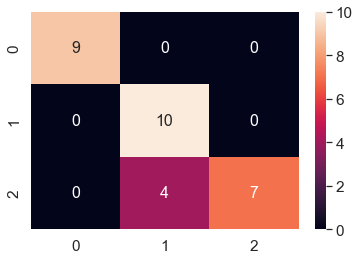

In [77]:
y_pred2 = pd.DataFrame(predicted_test_vals)
y_test2 = pd.DataFrame(real_test_vals)
mt = metrics.confusion_matrix(y_test2, y_pred2)
df_cm = pd.DataFrame(mt, range(3), range(3))
sns.set(font_scale = 1.4)
sns.heatmap(df_cm, annot = True, annot_kws = {"size":16})
plt.show()

Test verisinin karmaşıklık matrisi okunduğunda türler arasında "0" etiketli "*Iris Setosa*" çiçeğinden 9 tane olduğu ve 9'unun da doğru tahmin edildiği görülmektedir. 

"1" etiketli "*Iris Versicolor*" 10 tane veri mevcuttur. Ancak 4 tane "*Iris Virginica*" verisi yanlış bir şekilde "*Iris Versicolor*" olarak sınıflandırılmıştır.

"*Iris Virginica*" verileri incelencek olursa toplamda 11 tane veri vardır.Bunlardan 7 tanesi True Positive'dir.

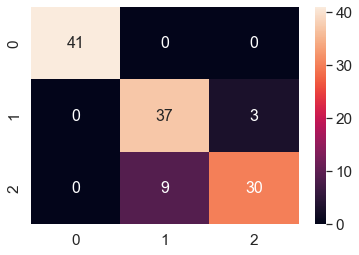

In [76]:
y_pred2 = pd.DataFrame(predicted_train_vals)
y_test2 = pd.DataFrame(real_train_vals)
mt = metrics.confusion_matrix(y_test2, y_pred2)
df_cm = pd.DataFrame(mt, range(3), range(3))
sns.set(font_scale = 1.4)
sns.heatmap(df_cm, annot = True, annot_kws = {"size":16})
plt.show()

Eğitim verisinin karmaşıklık matrisi okunduğunda türler arasında "0" etiketli "*Iris Setosa*" çiçeğinden 41 tane olduğu ve 41'inin de True Positive olarak doğru tahmin edilidiği görülmektedir.

"1" etiketli "*Iris Versicolor*" 40 tane veri mevcuttur. Ancak 9 tane "*Iris Virginica*" verisi yanlış bir şekilde "*Iris Versicolor*" olarak sınıflandırılmıştır. 3 tane "*Iris Virginica*" verisi de "*Iris Versicolour*" verisi olarak yanlış sınıflandırılmıştır.

"*Iris Virginica*" verileri incelencek olursa toplamda 39 tane veri vardır.Bunlardan 30 tanesi True Positive'dir.

## 1.2.5. PERFORMANCE METRICS

### 1.2.5.1. F1 Score

F1 Skoru, "*presicion*" ve "*recall*" performans ölçüm parametrelerinin harmonik ortalamasını alarak bulunmaktadır. Harmonik ortalamanın bir özelliği ortalaması alınan iki değerden küçük olana daha yakın çıkmasıdır. Bu nedenle F1 Skorunun yüksek çıkması için hem "*presicion*" hem de "*recall*" değerlerinin yüksek olması gerekmektedir.
\begin{equation}
F_{1} = \frac{2}{(\frac{1}{R})+(\frac{1}{P})}
\end{equation}

F1 Skoru yukarıdaki denklemdeki gibi hesaplanmaktadır. Bu denklemde R "*recall*" parametresini belirtirken, P "*presicion*" parametresini belirtmektedir.

In [71]:
f2 = metrics.f1_score(predicted_train_vals, real_train_vals, average = 'weighted')
print("Eğitimin F1 Skoru: ")
print(f2)
print("\n")
f1 = metrics.f1_score(predicted_test_vals, real_test_vals, average = 'weighted')
print("Testin F1 Skoru: ")
print(f1)

Eğitimin F1 Skoru: 
0.9006782945736433


Testin F1 Skoru: 
0.8703703703703702


Eğitim ve test verilerinin F1 Skorları ayrı ayrı incelendiğinde ikisinin de bire yakın olduğu görülmektedir. Bu da modelin başarısının yüksek olduğunu kanıtlamaktadır.

### 1.2.5.2. Accuracy

"*Accuracy*" başarım ölçümü için çokça kullanılan parametrelerden biridir. Toplam doğru sınıflandırmaların, toplam vaka sayısına oranı ile bulunmaktadır. Bu yöntemin başarıyı ölçmek için kullanılması bazı durumlarda manipüle edici olabilmektedir. Bunun nedeni bazen "*actual positive*" olarak adlandırılan verinin toplam verinin çok küçük bir kısmını oluşturup doğru sınıflandırılmadığında bile "*accuracy*"nin yüksek çıkabilmesinden dolayı kaynaklanmaktadır.

\begin{equation}
Accuracy = \frac{TP + TN}{TP + TN + FP+ FN}
\end{equation}

Bu parametreyi hesaplamak için kullanılan denklem de yukarıdaki gibidir. TP, TN, FP ve FN sırasıyla "*true positive*", "*true negative*", "*false positive*" ve "*false negative*"e denk gelmektedir.

In [72]:
accuracy1 = metrics.accuracy_score(predicted_train_vals, real_train_vals)
print("Eğitimin Accuracysi: ")
print(accuracy1)
print("\n")
accuracy2 = metrics.accuracy_score(predicted_test_vals, real_test_vals)
print("Testin Accuracysi: ")
print(accuracy2)

Eğitimin Accuracysi: 
0.9


Testin Accuracysi: 
0.8666666666666667


Eğitim ve test verilerinin "*Accuracy*"leri ayrı ayrı incelendiğinde ikisinin de bire yakın olduğu görülmektedir. Bu da öbekleme işleminin başarısının yüksek olduğunu kanıtlamaktadır.

### 1.2.5.3 Precision

"*Presicion*" parametresi, "*confusion matrix*"ten türetilmiş bir parametredir. "*True positive*"lerin, "*true positive*" ve "*false positive*"lerin toplamına oranı ile bulunmaktadır. Sınıflandırılmış pozitif verilerin ne kadar iyi sınıflandırıldığını görmek için kullanılan bir parametredir

\begin{equation}
Presicion = \frac{True Positive}{True Positive + False Positive}
\end{equation}

Yukarıdaki denklemde görüleceği üzere hesaplanmaktadır.

In [75]:
precision1 = metrics.precision_score(predicted_train_vals, real_train_vals, average = 'weighted')
print("Eğitimin Presicionu: ")
print(precision1)
print("\n")
precision2 = metrics.precision_score(predicted_test_vals, real_test_vals, average = 'weighted')
print("Testin Presicionu: ")
print(precision2)

Eğitimin Presicionu: 
0.9077884615384616


Testin Presicionu: 
0.9151515151515152


Test ve eğitim sonucu bire yakın çıkmıştır. Sonucun bire yakın çıkması, pozitif olarak sınıflandırılmış verilerden neredeyse tamamının doğru sınıflandırıldığını yani "*actual positive*" olduğunu göstermektedir.

### 1.2.5.4. Recall

"*Recall*" parametresi de "*confusion matrix*"ten türetilmiş bir parametredir. "*True positive*"lerin, "*true positive*" ve "*false negative*"lerin toplamına oranı ile bulunmaktadır. Gerçekten pozitif olan verilerden ne kadar iyi sınıflandırıldığını görmek için kullanılan bir parametredir.

\begin{equation}
Recall = \frac{True Positive}{True Positive + False Negative}
\end{equation}

Yukarıdaki denklemde görüleceği üzere hesaplanmaktadır.

In [74]:
recall1 = metrics.recall_score(predicted_train_vals, real_train_vals, average = 'weighted')
print("Eğitimin Recallu: ")
print(recall1)
print("\n")
recall2 = metrics.recall_score(predicted_test_vals, real_test_vals, average = 'weighted')
print("Testin Recallu: ")
print(recall2)

Eğitimin Recallu: 
0.9


Testin Recallu: 
0.8666666666666667


Test ve eğitim verilerinin "*recall*" sonucu bire yakın çıkmıştır. Sonucun bire yakın çıkması, gerçekten pozitif olan değerlerin iyi bir şekilde sınıflandırıldığını göstermektedir.

## 1.2.6. ROC CURVE AND AREA UNDER IT (AUC)

ROC "*true positive rate (TPR)*"in, "*false positive rate (FPR)*"e karşı çizdirilmesi ile bulunan bir eğridir. Verilerin her "*cut-off*" değeri için çizdirilmektedir. Bu grafiğin ölçümü ise eğirinin altındaki alanın hesaplanması ile bulunur. Bu alana "*area under curve (AUC)*" de denmektedir ve AUC bire yaklaştıkça sonuç daha iyiye gitmektedir.ROC eğrisi her bölgede incelenerek parametrik bir şekilde TP, TN, FP ve FN değerleri ile oynanmasını sağlamaktadır.

\begin{equation}
TPR = \frac{TP}{TP + FN}
\end{equation}

\begin{equation}
FPR = \frac{FP}{TN + FP}
\end{equation}

Eğrinin eksenlerini belirlemede kullanılan iki formül yukarıda görüldüğü gibidir. Aşağıda ise hem eğitim hem de test verisi için bu eğri çizdirilmiştir. Son olarak ROC'nin ortasında görülmekte olan kesikli çizgi rastgele gerçekleşen bir olayın eğrisini temsil etmektedir. Bu kesikli eğrinin altında kalan durumlarda sınıflandırmanın rastgele bir olaydan kötü gerçekleştiği yorumunu yapmak mümkündür.

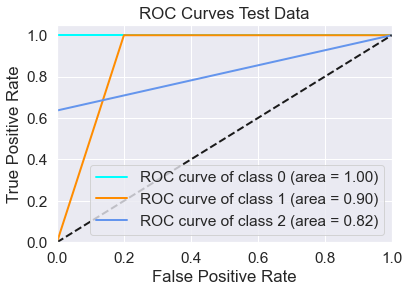

AUC Values of Each Classes ROC Curve are Written on Graph
Macro AUC Value
0.906060606060606


In [79]:
from sklearn.metrics import roc_curve, auc

y_testb = label_binarize(real_test_vals, classes=[0, 1, 2]);
y_predb = label_binarize(predicted_test_vals, classes=[0, 1, 2]);

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve (y_testb[:,i], y_predb[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))
mean_tpr = np.zeros_like (all_fpr)
for i in range(3):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i]);
mean_tpr /= 3;
fpr ["macro"] = all_fpr
tpr ["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    
plt.plot([0,1],[0,1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Test Data")
plt.legend(loc="lower right")
plt.show()
print("AUC Values of Each Classes ROC Curve are Written on Graph")
print("Macro AUC Value")
print(roc_auc["macro"])

Test verisi için eğri incelendiğinde "*Iris Setosa (0)*" türü için AUC bire eşit çıkmıştır. Bu da TP ve FP'lerin birbirinden mükemmel şekilde ayrılması ile olmuştur. "*Iris Setosa*"nın mükemmel olarak ayrılabileceği önceki "*scatter*" grafiklerinde de açıkça gözükmektedir. "*Iris Setosa (0)*" çok iyi bir şekilde öbeklenebilmiştir. Diğer iki türe gelecek olursa onlarda mükemmele yakın bir şekilde ayrılabilmiştir. Bunu grafiğin sağ altındaki AUC lejantından anlamak mümkündür.

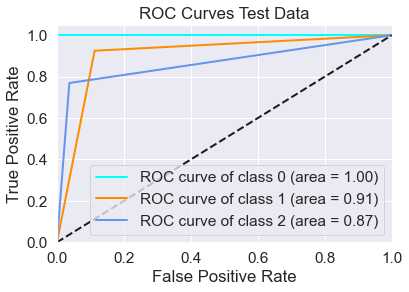

AUC Values of Each Classes ROC Curve are Written on Graph
Macro AUC Value
0.9241156220322885


In [80]:
x_testb = label_binarize(real_train_vals, classes=[0, 1, 2]);
x_predb = label_binarize(predicted_train_vals, classes=[0, 1, 2]);

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve (x_testb[:,i], x_predb[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))
mean_tpr = np.zeros_like (all_fpr)
for i in range(3):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i]);
mean_tpr /= 3;
fpr ["macro"] = all_fpr
tpr ["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    
plt.plot([0,1],[0,1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Test Data")
plt.legend(loc="lower right")
plt.show()
print("AUC Values of Each Classes ROC Curve are Written on Graph")
print("Macro AUC Value")
print(roc_auc["macro"])

Test verisi için çizdirilen ROC eğrisi için de benzer sonuçlar elde edilmiştir. Bunun sebebinin veri setinin benzer girdiler için benzer çıktılar veren bir veri seti olmasından kaynaklanmaktadır.

## 1.2.7. COMMENTS ON THE RESULTS

Karar ağaçları denetimli öğrenme tekniklerindendir ve etiketi belli olan veriler için kullanılmaktadır. Bu yöntem eğer sınırlandırılımazsa kolay "*overfit*" edebilecek bir yöntemdir.

K-Means clustering ise denetimsiz öğrenme tekniklerinden biridir ve etiketsiz verilerin öbeklenmesi için kullanılmaktadır. Bu denetimsiz öğrenme tekniklerinin temelinde benzer girdilerin, benzer çıktılar vermesi temeli yatmaktadır. Bu yöntem "*outlier*" ve parabolik veriler için başarısız sınıflandırma yapmaktadır. Yani verilerin kötü dağılımlarında başarısı düşük bir sistemdir. 

Denetimsiz öğrenme teknikleri, kendi görevlerinin dışında aynı zamanda etkiteli veriler için bir ön işlem olarak da kullanılmaktadır. Bu sayede verilerin basit bir şekilde ayrıştırılıp ayrıştıtılamayacağının sonucuna ulaşılabilir. 

Burada elde edilen sonuçlar karar ağaçlarında elde edilen sonuçlar ile karşılaştırıldığında; F1 Skoru , "*accuracy*", "*presicion*", "*recall*" ve "*ROC, AUC*" değerlerinin KMeans'te azaldığı görülmüştür. Yani karar ağaçları sınıflandırmada daha başarılı olmuştur. Bunun sebebi veri setinin çok doğrusal bir şekilde uzaya yayılmamış olmasındandır. Bu nedenle karar ağacı verilerin etrafına daha kolay nüfuz edebilmiştir.